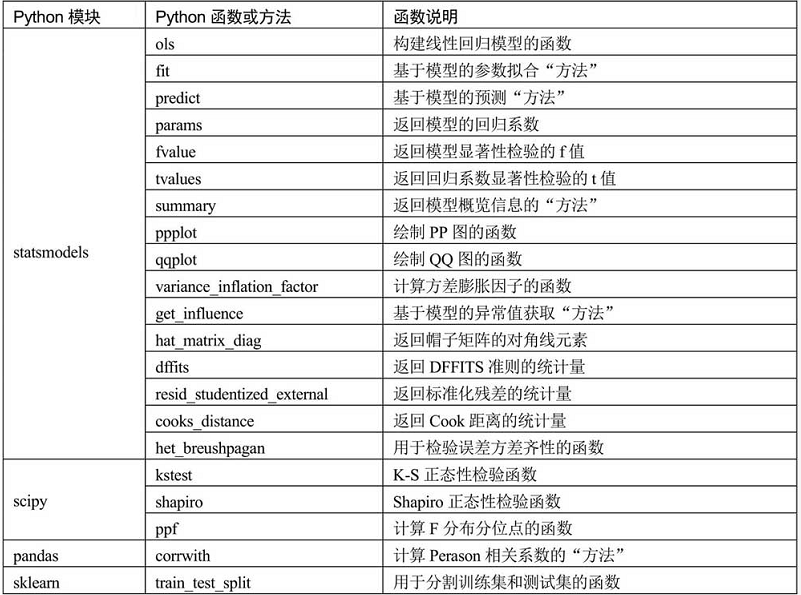

# 一元回归模型


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#导入数据集
income = pd.read_csv('Salary_Data.csv')

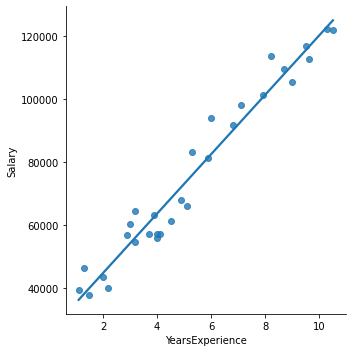

In [3]:
#绘制散点图
sns.lmplot(x='YearsExperience',y='Salary',data=income,ci=None)
plt.show()

In [4]:
import statsmodels.api as sm

In [5]:
#利用收入数据集，构建回归模型
fit = sm.formula.ols('Salary ~ YearsExperience',data=income).fit()

In [6]:
#返回模型的参数
fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# 多元回归模型


In [7]:
#导入模块
from sklearn import model_selection

In [8]:
#导入数据
Profit = pd.read_excel('Predict to Profit.xlsx')

In [9]:
Profit.head(5)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
#将数据集拆分为训练集和测试集
train,test = model_selection.train_test_split(Profit,test_size=0.2,random_state=1234)

In [11]:
#根据train数据集建模
model = sm.formula.ols('Profit ~  RD_Spend + Administration + Marketing_Spend + C(State)',data=train).fit()

In [12]:
print('模型的片回归系数分别为:\n',model.params)

模型的片回归系数分别为:
 Intercept               58581.516503
C(State)[T.Florida]       927.394424
C(State)[T.New York]     -513.468310
RD_Spend                    0.803487
Administration             -0.057792
Marketing_Spend             0.013779
dtype: float64


In [13]:
#删除test数据集中的Profit变量，用剩下的自变量进行预测
test_X = test.drop(labels='Profit',axis=1)
pred = model.predict(exog=test_X)
print("对比预测值和实际值的差异:\n",pd.DataFrame({'Prediction':pred,'Real':test.Profit}))

对比预测值和实际值的差异:
        Prediction       Real
8   150621.345802  152211.77
48   55513.218079   35673.41
14  150369.022458  132602.65
42   74057.015562   71498.49
29  103413.378282  101004.64
44   67844.850378   65200.33
4   173454.059692  166187.94
31   99580.888894   97483.56
13  128147.138396  134307.35
18  130693.433835  124266.90


In [14]:
#对上述代码进行修改，防止california自动变为哑变量

In [15]:
#生成由State变量衍生的哑变量
dummies = pd.get_dummies(Profit.State)
#将哑变量与原始数据集水平合并
Profit_New = pd.concat([Profit,dummies],axis=1)

In [16]:
#删除State变量和California变量（因为State变量已经被分解为哑变量，New York变量需要作为参照组）
Profit_New.drop(labels=['State','New York'],axis=1,inplace=True)

In [17]:
#拆分数据集Profit_New
train,test = model_selection.train_test_split(Profit_New,test_size=0.2,random_state=1234)

In [18]:
#建模
model2 = sm.formula.ols('Profit~ RD_Spend + Administration + Marketing_Spend + Florida + California',data = train).fit()
print("模型的偏回归系数分别为:\n",model2.params)

模型的偏回归系数分别为:
 Intercept          58068.048193
RD_Spend               0.803487
Administration        -0.057792
Marketing_Spend        0.013779
Florida             1440.862734
California           513.468310
dtype: float64


# F检验

In [19]:
#先看一下实际F统计量的值

In [20]:
#导入第三方模块
import numpy as np
#计算建模数据中因变量的均值
ybar = train.Profit.mean()
#统计变量个数和观测个数
p = model2.df_model
n = train.shape[0]
#计算回归离差平方和
SSR = np.sum((model2.fittedvalues-ybar)**2)
#计算误差平方和
SSE = np.sum(model2.resid **2)
#计算F统计量的值
MSR = SSR/p
MSE = SSE/(n-p-1)
F = MSR/MSE
print(f"F统计量的值:{F}")

F统计量的值:174.63721716844697


In [21]:
#导入模块
from scipy.stats import f
#计算F分布的理论值
F_Theroy = f.ppf(q=0.95,dfn=p,dfd=n-p-1)
print(f'F分布理论值为:{F_Theroy}')

F分布理论值为:2.502635007415366


In [22]:
#其实有更方便的得到F统计量的值的方法
model2.fvalue

174.63721715703548

In [23]:
#t检验

In [24]:
model2.summary()#该方法可得到所有概览信息

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 06 May 2022   Prob (F-statistic):           9.74e-23
Time:                        12:08:30   Log-Likelihood:                -401.20
No. Observations:                  39   AIC:                             814.4
Df Residuals:                      33   BIC:                             824.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.807e+04   6846.305      8.482      0.000    4.41e+04     7.2e+04
RD_Spend            0.8035      0.040     19.988      0.000       0.722       0.885
Administration     -0.0578      0.051     -1.133      0.265      -0.162       0.046
Marketing_Spend     0.0138      0.015      0.930      0.359      -0.016       0.044
Florida          1440.8627   3059.931      0.471      0.641   -4784.615    7666.340
California        513.4683   3043.160      0.169      0.867   -5677.887    6704.824
==============================================================================
Omnibus:                        1.721   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.148
Skew:                           0.096   Prob(JB):                        0.563
Kurtosis:                       2.182   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 回归模型的诊断

1.误差项服从正态分布

2.无多重共线性

3.线性相关性

4.误差项独立性

5.方差齐性

# 正态性检验

In [25]:
#直方图法

D:\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


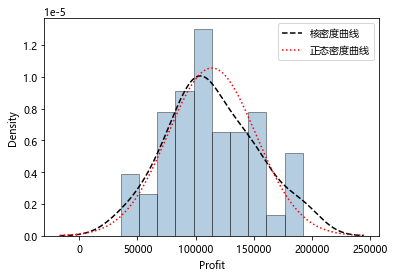

In [26]:
#导入第三方模块
import scipy.stats as stats
#中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']  = False
#绘制直方图
sns.distplot(
    a = Profit_New.Profit,bins = 10, fit = stats.norm,
    norm_hist = True,hist_kws = {'color':'steelblue','edgecolor':'black'},
    kde_kws = {'color':'black','linestyle':'--','label':'核密度曲线'},
    fit_kws = {'color':'red','linestyle':':','label':'正态密度曲线'}
)
#显示图例
plt.legend()
#显示图形
plt.show()

# PP图和QQ图

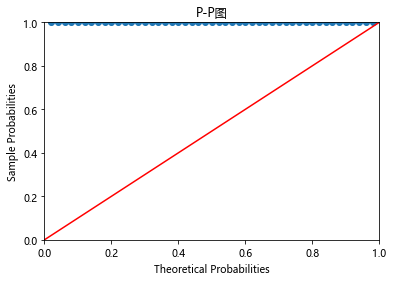

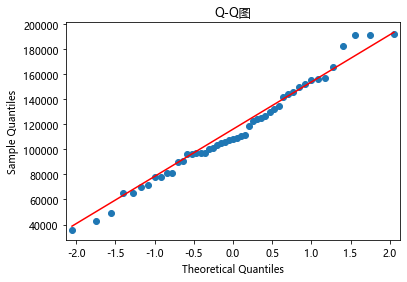

In [27]:
#残差的正态性检验
pp_qq_plot = sm.ProbPlot(Profit_New.Profit)
#绘制PP图
pp_qq_plot.ppplot(line= '45')
plt.title('P-P图')
#绘制QQ图
pp_qq_plot.qqplot(line='q')
plt.title('Q-Q图')
plt.show()

# Shapiro检验和K-S检验

#数据量小于5000使用Shapiro好，数据量大于5000用K-S

In [28]:
#导入模块
import scipy.stats as stats
#Shapiro检验
stats.shapiro(Profit_New.Profit)

ShapiroResult(statistic=0.9793398380279541, pvalue=0.537902295589447)

In [29]:
#应用K-S检验的函数kstest，随机生成正态分布变量x1和均匀分布变量x2

In [30]:
#s生成正态分布和均匀分布随机数
rnorm = np.random.normal(loc = 5, scale = 2, size = 10000)
runif = np.random.uniform(low = 1, high = 100, size = 10000)
#正态性检验
KS_Test1 = stats.kstest(rvs = rnorm , args = (rnorm.mean(),rnorm.std()),cdf = 'norm')#args用于传递被检验变量的均值和标准差
KS_Test2 = stats.kstest(rvs = runif , args = (runif.mean(),runif.std()),cdf = 'norm')
print(KS_Test1)
print(KS_Test2)

KstestResult(statistic=0.007658622180938157, pvalue=0.5977660586080238)
KstestResult(statistic=0.057507415842149245, pvalue=3.4571927316148383e-29)


# 多重共线性检验

In [31]:
#计算方差扩大因子VIF(如果存在多重共线性可以考虑删除变量或者选择岭回归模型或者LASSO模型)

In [32]:
#导入statsmodels模块中的函数
from statsmodels.stats.outliers_influence import variance_inflation_factor

#自变量X（包含RD_Spend,Marketing_Spend和常数列1）
X = sm.add_constant(Profit_New.loc[:,['RD_Spend','Marketing_Spend']])

#构造空的数据框用于储存VIF值
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

#返回vif值
vif

,features,VIF Factor
0,const,4.540984
1,RD_Spend,2.026141
2,Marketing_Spend,2.026141


# 线性相关性检验

In [33]:
#计算数据集Profit_New中每个自变量与因变量利润之间的相关系数

In [34]:
Profit_New.drop('Profit',axis=1).corrwith(Profit_New.Profit)

RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
California        -0.083258
Florida            0.088008
dtype: float64

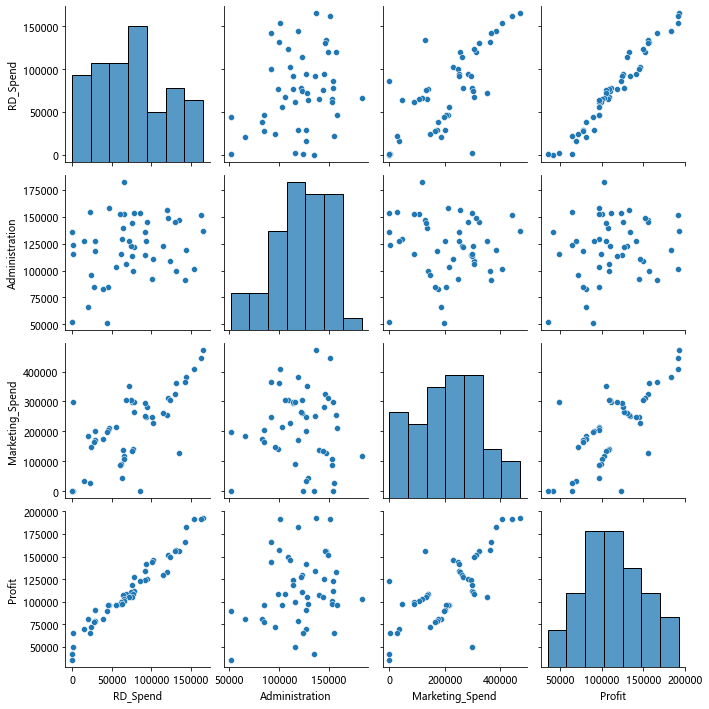

In [35]:
#导入模块
import matplotlib.pyplot as plt
import seaborn

#绘制散点图矩阵
seaborn.pairplot(Profit_New.loc[:,['RD_Spend','Administration','Marketing_Spend','Profit']])

plt.show()

In [37]:
#模型修正
model3 = sm.formula.ols('Profit~RD_Spend + Marketing_Spend',data = train).fit()
#模型回归系数的估计值
model3.params

Intercept          51902.112471
RD_Spend               0.785116
Marketing_Spend        0.019402
dtype: float64

# 异常值检验

可利用帽子矩阵，DFFITS准则，学生化残差或者Cook距离进行异常点检测

In [38]:
#异常值检验
outliers = model3.get_influence()

In [39]:
#高杠杆值点（帽子矩阵）
leverage = outliers.hat_matrix_diag

In [40]:
#dffits值
dffits = outliers.dffits[0]

In [41]:
#学生化残差
resid_stu = outliers.resid_studentized_external

In [42]:
#cook距离
cook = outliers.cooks_distance[0]

In [43]:
#合并各种异常值检验的统计量值
contat1 = pd.concat([pd.Series(leverage,name = 'leverage'),
                     pd.Series(dffits,name = 'dffits'),
                    pd.Series(resid_stu,name = 'resid_stu'),
                    pd.Series(cook,name = 'cook')],axis = 1)

In [44]:
#重设train数据的行索引
train.index = range(train.shape[0])

In [45]:
#将上面的统计量与train数据集合并
profit_outliers = pd.concat([train,contat1],axis=1)
profit_outliers.head()

,RD_Spend,Administration,Marketing_Spend,Profit,California,Florida,leverage,dffits,resid_stu,cook
0,28663.76,127056.21,201126.82,90708.19,0,1,0.066517,0.466410,1.747255,0.068601
1,15505.73,127382.30,35534.17,69758.98,0,0,0.093362,0.221230,0.689408,0.016556
2,94657.16,145077.58,282574.31,125370.37,0,0,0.032741,-0.156225,-0.849138,0.008199
3,101913.08,110594.11,229160.95,146121.95,0,1,0.039600,0.270677,1.332998,0.023906
4,78389.47,153773.43,299737.29,111313.02,0,0,0.042983,-0.228563,-1.078496,0.017335


In [46]:
#使用标准化残差，当标准化残差大于2时，对应的数据点为异常值

In [57]:
#计算异常值数量的比例
outliers_ratio = sum(np.where((np.abs(profit_outliers.resid_stu)>2),1,0))/profit_outliers.shape[0]
outliers_ratio

0.02564102564102564

In [58]:
#如果小于5%可以直接删除异常点，如果大于5%要靠路边是否对异常点设置哑变量值为1

In [60]:
#挑选出非异常的观测点
none_outliers = profit_outliers.loc[np.abs(profit_outliers.resid_stu)<=2,:]
#应用无异常值的数据重新建模
model4 = sm.formula.ols('Profit~RD_Spend + Marketing_Spend',data = none_outliers).fit()
model4.params

Intercept          51827.416821
RD_Spend               0.797038
Marketing_Spend        0.017740
dtype: float64

In [61]:
#独立性检验

In [65]:
#残差的独立性检验通常使用Durbin-Watson统计量测试，正常范围0-4，越接近2独立可行性越大
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     520.7
Date:                Fri, 06 May 2022   Prob (F-statistic):           9.16e-27
Time:                        12:41:47   Log-Likelihood:                -389.18
No. Observations:                  38   AIC:                             784.4
Df Residuals:                      35   BIC:                             789.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.183e+04   2501.192     20.721      0.000    4.67e+04    5.69e+04
RD_Spend            0.7970      0.034     23.261      0.000       0.727       0.867
Marketing_Spend     0.0177      0.013      1.391      0.173      -0.008       0.044
==============================================================================
Omnibus:                        7.188   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.744
Skew:                           0.321   Prob(JB):                        0.254
Kurtosis:                       1.851   Cond. No.                     5.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 方差齐性检验

模型残差项的方差不随自变量的变动而呈现出某种趋势，否则残差的趋势可以被自变量刻画，导致偏回归系数不具备有效性

# 1.图形法

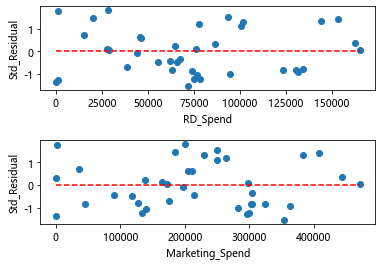

In [72]:
#设置第一张子图的位置
ax1 = plt.subplot2grid(shape = (2,1),loc = (0,0))

#绘制散点图
ax1.scatter(none_outliers.RD_Spend,(model4.resid-model4.resid.mean())/model4.resid.std())

#添加水平参考线
ax1.hlines(y=0,
           xmin = none_outliers.RD_Spend.min(),
           xmax = none_outliers.RD_Spend.max(),
           color = 'red',
           linestyles = '--')

#添加x轴和y轴标签
ax1.set_xlabel('RD_Spend')
ax1.set_ylabel('Std_Residual')

#设置第二章子图的位置
ax2 = plt.subplot2grid(shape = (2,1),loc = (1,0))

#绘制散点图
ax2.scatter(none_outliers.Marketing_Spend,(model4.resid-model4.resid.mean())/model4.resid.std())

#添加水平参考线
ax2.hlines(y=0,
           xmin = none_outliers.Marketing_Spend.min(),
           xmax = none_outliers.Marketing_Spend.max(),
           color = 'red',
           linestyles = '--'
            )

#添加x轴和y轴标签
ax2.set_xlabel('Marketing_Spend')
ax2.set_ylabel('Std_Residual')

#调整子图之间的水平间距和高度间距
plt.subplots_adjust(hspace = 0.6,wspace=0.3)
#显示图形
plt.show()


# 2.BP检验

In [78]:
#BP检验

sm.stats.diagnostic.het_breuschpagan(model4.resid, exog_het = model4.model.exog)
#LM统计量
#统计量对应的概率p值
#F统计量，检验残差平方项与自变量之间是否独立，独立则表明残差方差齐性
#F统计量的概率p值

(1.4675103668308258,
 0.48010272699006595,
 0.7029751237162416,
 0.5019659740962892)

# 回归模型预测

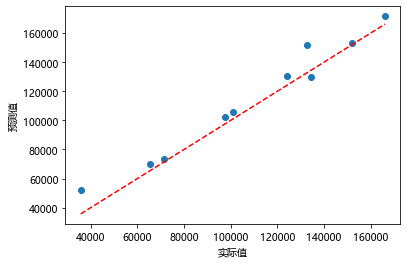

In [80]:
#model4对测试集的预测
pred4 = model4.predict(exog = test.loc[:,['RD_Spend','Marketing_Spend']])

#绘制预测值与实际值的散点图
plt.scatter(x = test.Profit, y = pred4)

#添加斜率为1，截距项为0的参考线
plt.plot([test.Profit.min(),test.Profit.max()],[test.Profit.min(),test.Profit.max()],
        color = 'red',
        linestyle = '--')

#添加轴标签
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.show()